# Loading Modules and Data

In [8]:
# Loading Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

# Filtering Warnings from Outputs
import warnings
warnings.filterwarnings('ignore')

# Setting the default parameter values
import matplotlib.pylab as pylab
pylab.rcParams["figure.figsize"] = (14, 7)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [9]:
# Reading data
bank_data = pd.read_csv("bank-additional-full.csv", 
                        sep = ";")

# Renaming the column 'y' to 'target'
bank_data.rename(columns={"y": "target"},inplace = True)
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

In [11]:
# Basic exploration
def execute_eda(df, data_name=""):
    # Displaying basic information
    print(f"Performing EDA on {data_name} Data....")
    print(f"Size: {df.size}")
    print(f"Columns: {df.shape[1]}")
    print(f"Records: {df.shape[0]}")
    print("="*50)

    # Separating the numerical and categorical columns
    categorical_cols = df.select_dtypes("O").columns
    numerical_cols = df.select_dtypes(np.number).columns

    # Displaying the numerical columns
    print("The dataset includes the following numerical columns...")
    for i, j in enumerate(numerical_cols):
        print(f" {i+1}) {j}")

    # Displaying the categorical columns
    print("\n\nThe dataset includes the following categorical columns...")
    for i, j in enumerate(categorical_cols):
        print(f" {i+1}) {j}")

    # Displaying data type and non-null values
    print("="*50)
    print("Data Information....")
    print(df.info())
    print("="*50)

    # Displaying statistical properties
    print("Statistical Properties of Data....")
    display(df.describe(include="all"))
    print("="*50)

In [12]:
execute_eda(bank_data, "Bank")

Performing EDA on Bank Data....
Size: 863898
Columns: 21
Records: 41138
The dataset includes the following numerical columns...
 1) age
 2) duration
 3) campaign
 4) pdays
 5) previous
 6) emp.var.rate
 7) cons.price.idx
 8) cons.conf.idx
 9) euribor3m
 10) nr.employed


The dataset includes the following categorical columns...
 1) job
 2) marital
 3) education
 4) default
 5) housing
 6) loan
 7) contact
 8) month
 9) day_of_week
 10) poutcome
 11) target
Data Information....
<class 'pandas.core.frame.DataFrame'>
Index: 41138 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41138 non-null  int64  
 1   job             41138 non-null  object 
 2   marital         41138 non-null  object 
 3   education       41138 non-null  object 
 4   default         41138 non-null  object 
 5   housing         41138 non-null  object 
 6   loan            41138 non-null  object 
 7   cont

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41138.000000,41138,41138,41138,41138,41138,41138,41138,41138,41138,41138.000000,41138.000000,41138.000000,41138.000000,41138,41138.000000,41138.000000,41138.000000,41138.000000,41138.000000,41138
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10413,24904,12150,32548,21550,33907,26111,13751,8614,NaN,NaN,NaN,NaN,35520,NaN,NaN,NaN,NaN,NaN,36505
mean,40.027444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.320604,2.567650,962.503330,0.173003,NaN,0.081868,93.575707,-40.502448,3.621287,5167.034131,NaN
std,10.422548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.355992,2.770668,186.842677,0.495053,NaN,1.571075,0.578872,4.628555,1.734475,72.256455,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


### Univariate Analysis

In [67]:
# Function to annotate bar plot with counts and percentages
def analyze_categorical_feature(df, feature_name, title="", figsize=(16, 5)):
    feature = df[feature_name]
    
    # Total number of unique values in the feature
    print("Total unique values are:", len(feature.value_counts()), "\n")
    print("Category\tValue\n")
    
    # Frequency of each category in the feature
    data = feature.value_counts()
    print(data)
    
    # Plotting bar plot
    sns.set_style('darkgrid')
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.color_palette("icefire"))
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature_name.capitalize(), fontsize=12)
    
    # Total number of entries in the feature
    total = len(feature)
    
    # Annotating each bar with the count and percentage
    for p in plot.patches:
        count = p.get_height()
        percentage = '{:.1f}%'.format(100 * count / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + count
        plot.annotate(f'{percentage}', (x, y), size=11, ha='center')
    
    # Display the plot
    plt.show()

In [68]:
# Function to create bar and pie charts with counts and percentages
def analyze_categorical_feature_with_multi_charts(df, feature_name, title="", figsize=(16, 5)):
    feature = df[feature_name]
    
    # Total number of unique values in the feature
    print("Total unique values are:", len(feature.value_counts()), "\n")
    print("Category\tValue\n")
    
    # Frequency of each category in the feature
    data = feature.value_counts()
    print(data)
    
    categories_num = len(data)
    
    # Plotting bar plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=figsize)

    # Bar plot
    plt.subplot(1, 2, 1)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)    
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="white", palette=sns.color_palette("icefire"))
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature_name.capitalize(), fontsize=12)

    total = len(feature)
    
    # Annotating each bar with the count and percentage
    for p in plot.patches:
        count = p.get_height()
        percentage = '{:.1f}%'.format(100 * count / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + count
        plot.annotate(f'{percentage}', (x, y), size=11, ha='center')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    labels = data.index
    plt.pie(x=data, autopct=lambda p: f'{p:.1f}%', explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title, fontsize=16)
    
    # Display the plots
    plt.show()

Total unique values are: 12 

Category	Value

job
admin.           10413
blue-collar       9245
technician        6736
services          3963
management        2915
retired           1719
entrepreneur      1455
self-employed     1417
housemaid         1058
unemployed        1014
student            873
unknown            330
Name: count, dtype: int64


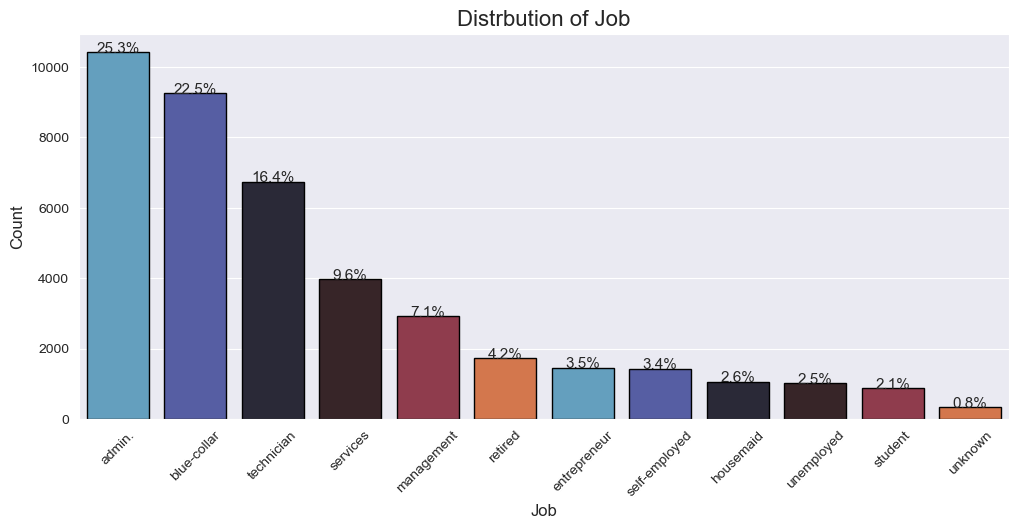

In [72]:
analyze_categorical_feature(bank_data, "job", "Distrbution of Job", figsize=(12, 5))

Most of the people were having Job Title **Admin, Blue-Collar**.

Total unique values are: 4 

Category	Value

marital
married     24904
single      11547
divorced     4607
unknown        80
Name: count, dtype: int64


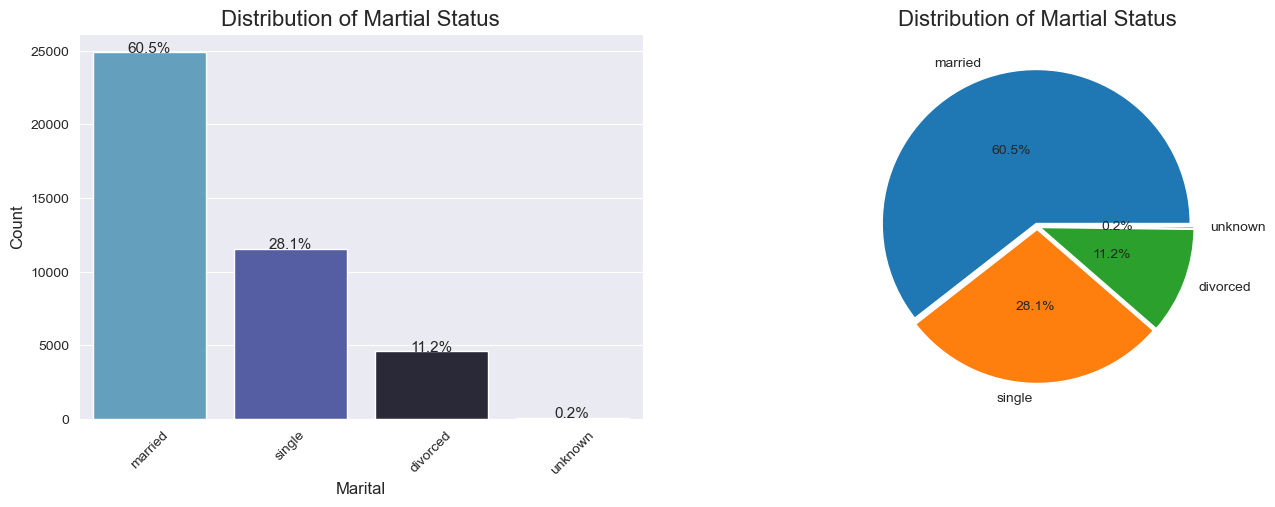

In [73]:
analyze_categorical_feature_with_multi_charts(bank_data, "marital", "Distribution of Martial Status")

Most of them were **Married**.

Total unique values are: 8 

Category	Value

education
university.degree      12150
high.school             9500
basic.9y                6038
professional.course     5240
basic.4y                4173
basic.6y                2290
unknown                 1729
illiterate                18
Name: count, dtype: int64


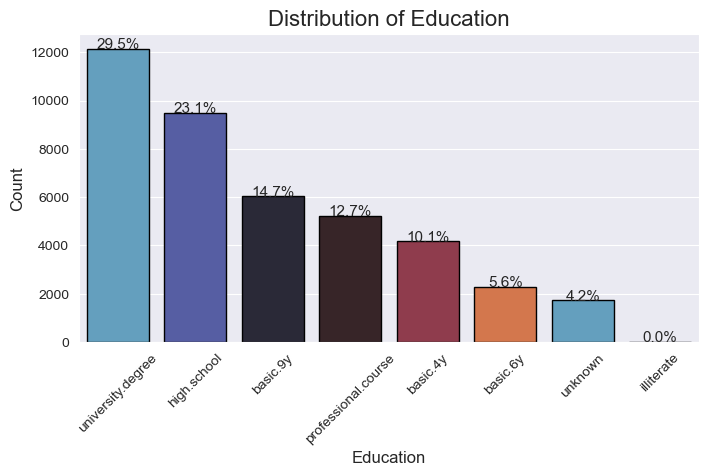

In [75]:
analyze_categorical_feature(bank_data, "education", "Distribution of Education", figsize=(8, 4))

Total unique values are: 3 

Category	Value

default
no         32548
unknown     8587
yes            3
Name: count, dtype: int64


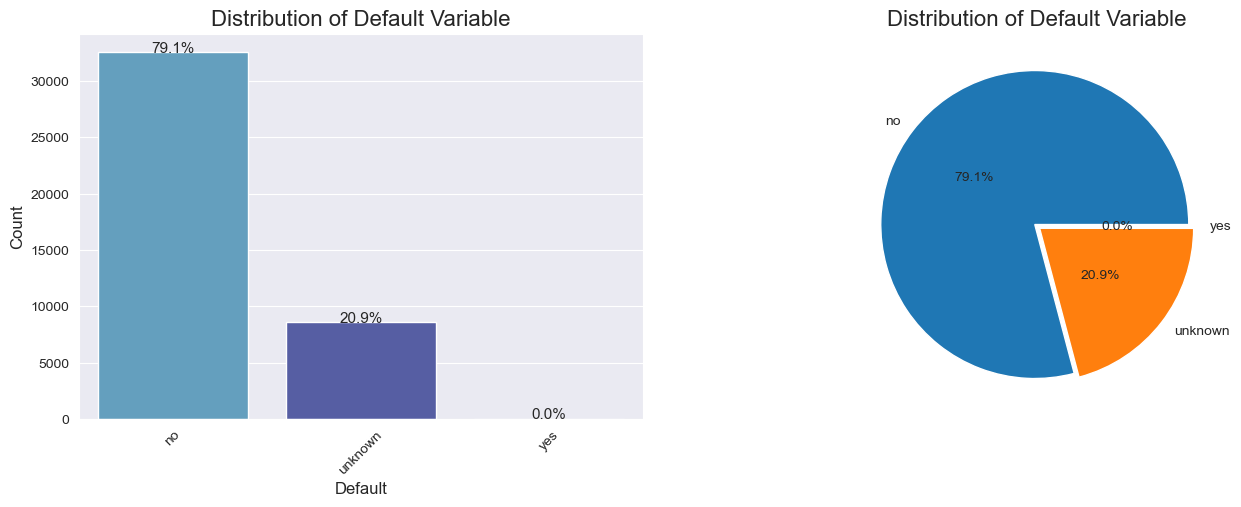

In [76]:
analyze_categorical_feature_with_multi_charts(bank_data, "default", "Distribution of Default Variable")

Total unique values are: 3 

Category	Value

housing
yes        21550
no         18599
unknown      989
Name: count, dtype: int64


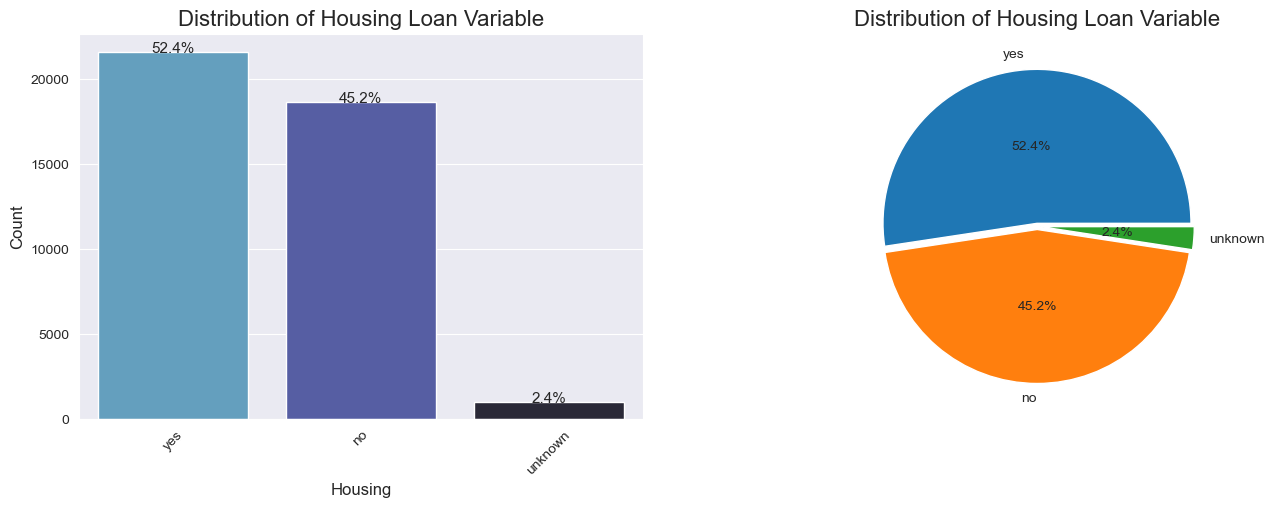

In [80]:
analyze_categorical_feature_with_multi_charts(bank_data, "housing", "Distribution of Housing Loan Variable")

Total unique values are: 3 

Category	Value

loan
no         33907
yes         6242
unknown      989
Name: count, dtype: int64


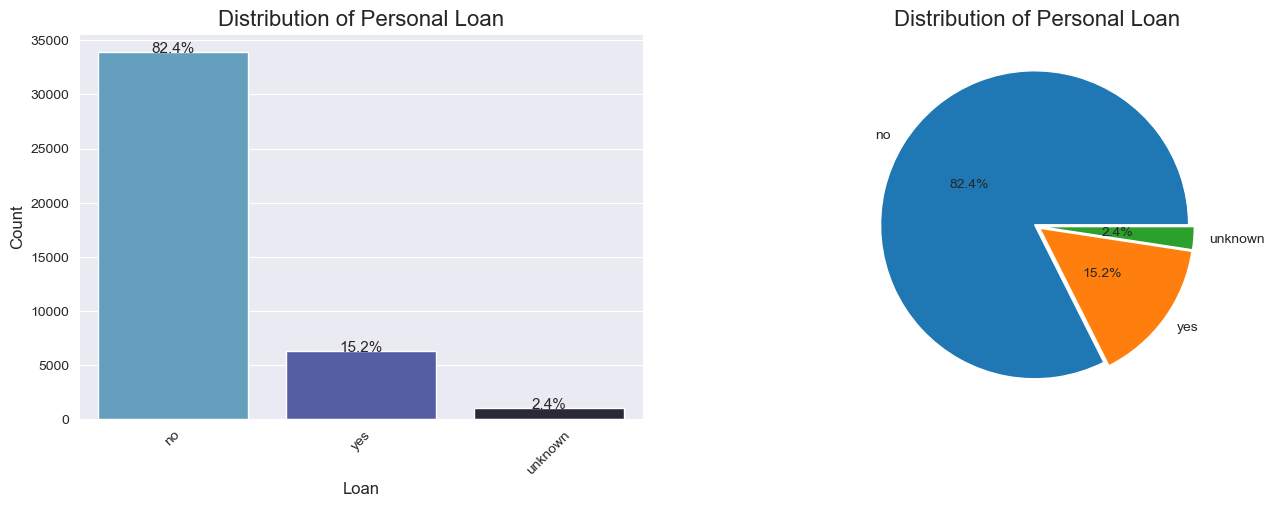

In [81]:
analyze_categorical_feature_with_multi_charts(bank_data, "loan", "Distribution of Personal Loan")

Total unique values are: 2 

Category	Value

contact
cellular     26111
telephone    15027
Name: count, dtype: int64


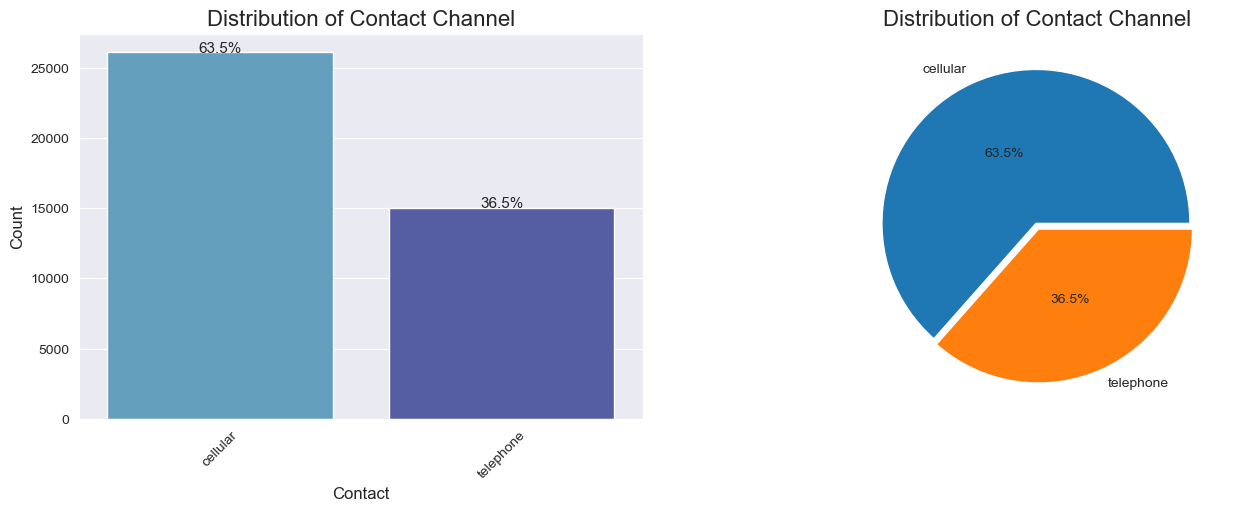

In [82]:
analyze_categorical_feature_with_multi_charts(bank_data, "contact", "Distribution of Contact Channel")

Total unique values are: 2 

Category	Value

target
no     36505
yes     4633
Name: count, dtype: int64


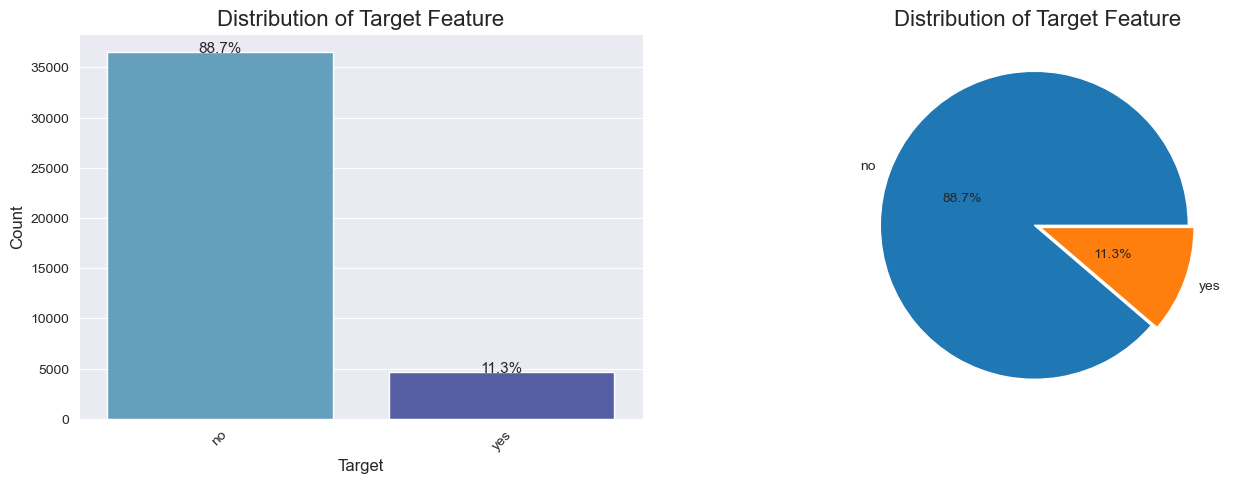

In [78]:
analyze_categorical_feature_with_multi_charts(bank_data, "target", "Distribution of Target Feature")

**Distribution of Job**

 - **Admin:** The majority of clients fall into the 'admin.' category, making up 25.3% of the total, with over 10,000 instances.
 - **Blue-Collar:** The second most common job category, accounting for 22.5% with around 9,000 instances.
 - **Technician:** Represents 16.4% of the dataset with approximately 7,000 instances.
 - Other job categories such as services, management, and retired have lower representations, with 'unknown' being the least common at 0.8%.

**Distribution of Marital Status**

 - **Married:** The dominant marital status, with 60.5% of clients being married, totaling around 25,000 instances.
 - **Single:** Accounts for 28.1% of the dataset with about 11,000 instances.
 - **Divorced:** Comprises 11.2% with approximately 4,500 instances.
 - **Unknown:** A negligible proportion at 0.2%.
 - The pie chart corroborates these findings, visually representing the percentages and counts for each marital status.

**Distribution of Education**

 - **University Degree:** The highest educational level, making up 29.5% with over 12,000 instances.
 - **High School:** The second most common education level at 23.1%, approximately 9,000 instances.
 - Other education levels such as basic.9y, professional.course, and basic.4y show decreasing proportions, with 'illiterate' being virtually nonexistent.

**Distribution of Default Variable**

 - **No Default:** The majority of clients have no credit in default, comprising 79.1% with over 30,000 instances.
 - **Unknown:** Represents 20.9% of the dataset.
 - **Yes Default:** Negligible or non-existent in this dataset.
 - The pie chart further highlights the predominance of clients without default.

**Distribution of Housing Variable**

 - **Yes Housing Loan:** The majority have a housing loan, making up 52.4% with over 20,000 instances.
 - **No Housing Loan:** Accounts for 45.2%, approximately 18,000 instances.
 - **Unknown:** A small percentage at 2.4%.
 - The pie chart visually confirms these percentages and counts.

**Distribution of Personal Loan**
 - **No Personal Loan:** The majority of clients, 82.4%, do not have a personal loan. This group constitutes about 35,000 instances.
 - **Yes Personal Loan:** 15.2% of clients have a personal loan, totaling around 6,800 instances.
 - **Unknown:** A small percentage of 2.4% falls under the 'unknown' category.
 - The pie chart visually confirms these proportions, indicating that a significant majority of clients do not have a personal loan.

**Distribution of Contact Channel**
 - **Cellular:** The majority of contacts were made via cellular, accounting for 63.5% with around 26,000 instances.
 - **Telephone:** 36.5% of contacts were made via telephone, approximately 15,000 instances.
 - The pie chart corroborates these findings, highlighting the predominance of cellular contacts over telephone contacts.

**Distribution of Target Feature**

 - **No Subscription:** The majority of clients did not subscribe to the term deposit, making up 88.7% with over 35,000 instances.
 - **Yes Subscription:** Only 11.3% of clients accepted the offere and subscribed the offer presented by the bank.
 - The pie chart highlights this disparity, showing the vast majority of 'no' responses.
 - This is the target feature that I have to use for prediction, but there is a problem that data is imbalanced between 2 classes. So before using it I have to make it balanced.